In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks')

In [0]:
URL='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'
online_rt=pd.read_csv(URL,encoding='latin1')
online_rt.head()
filtered_data = online_rt[online_rt['Country'] != 'United Kingdom']


In [0]:

countries=filtered_data.groupby('Country')['Quantity'].sum()
countries_sort=countries.sort_values(ascending=False)
top_10_countries = countries_sort.head(10)
colors=plt.cm.tab10.colors
countries


Country
Australia                83653
Austria                   4827
Bahrain                    260
Belgium                  23152
Brazil                     356
Canada                    2763
Channel Islands           9479
Cyprus                    6317
Czech Republic             592
Denmark                   8188
EIRE                    142637
European Community         497
Finland                  10666
France                  110480
Germany                 117448
Greece                    1556
Hong Kong                 4769
Iceland                   2458
Israel                    4353
Italy                     7999
Japan                    25218
Lebanon                    386
Lithuania                  652
Malta                      944
Netherlands             200128
Norway                   19247
Poland                    3653
Portugal                 16180
RSA                        352
Saudi Arabia                75
Singapore                 5234
Spain                    26824


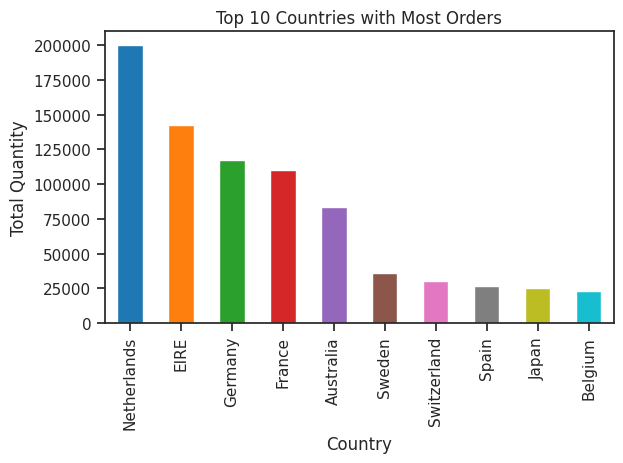

In [0]:
top_10_countries.plot(kind='bar', color=colors)
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.title('Top 10 Countries with Most Orders')
plt.tight_layout()
plt.show()

In [0]:
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


/home/spark-41280fd9-656e-4718-b897-b4/.ipykernel/2848/command-8529720509405099-3202613470:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customers = online_rt.groupby(['CustomerID','Country']).sum()
/databricks/python/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


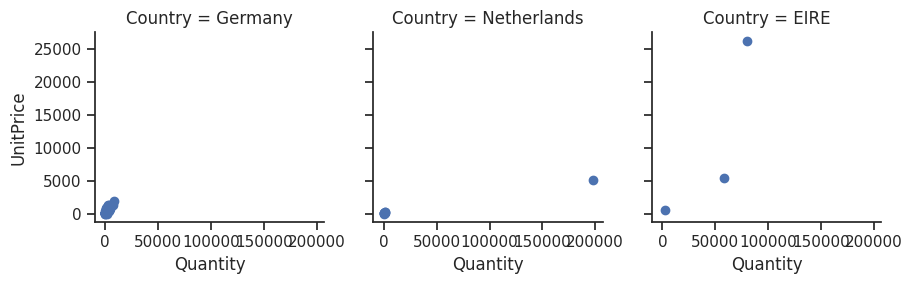

In [0]:
customers = online_rt.groupby(['CustomerID','Country']).sum()
customers = customers[customers.UnitPrice > 0]
customers['Country'] = customers.index.get_level_values(1)
top_countries = ['Netherlands', 'EIRE', 'Germany']
customers = customers[customers['Country'].isin(top_countries)]
g = sns.FacetGrid(customers, col="Country")
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)
g.add_legend()

In [0]:
customers = online_rt.groupby(['CustomerID','Country']).sum().head()
customers

/home/spark-41280fd9-656e-4718-b897-b4/.ipykernel/2848/command-8529720509405100-1893701143:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customers = online_rt.groupby(['CustomerID','Country']).sum().head()


,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


In [0]:
customers.UnitPrice.dtype

dtype('float64')

In [0]:
display(online_rt[online_rt.CustomerID ==12347.0].sort_values(by='UnitPrice',ascending=False).head())
display(online_rt[online_rt.CustomerID ==12346.0].sort_values(by='UnitPrice',ascending=False).head())

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
573511,22423,REGENCY CAKESTAND 3 TIER,6,10/31/11 12:25,12.75,12347.0,Iceland
562032,22423,REGENCY CAKESTAND 3 TIER,3,8/2/11 8:48,12.75,12347.0,Iceland
542237,22423,REGENCY CAKESTAND 3 TIER,3,1/26/11 14:30,12.75,12347.0,Iceland
549222,22423,REGENCY CAKESTAND 3 TIER,3,4/7/11 10:43,12.75,12347.0,Iceland
573511,23173,REGENCY TEAPOT ROSES,2,10/31/11 12:25,9.95,12347.0,Iceland


InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


In [0]:

sales_volume =online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False)
top3 = sales_volume.index[1:4] 
top3


Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

In [0]:
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice
online_rt.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [0]:
grouped=online_rt[online_rt.Country.isin(top3)].groupby(['CustomerID','Country'])
plottable=grouped['Quantity','Revenue'].agg(sum)
plottable['Average Price']=plottable.Revenue/plottable.Quantity
plottable['Country'] = plottable.index.get_level_values(1)
plottable.head()

/home/spark-41280fd9-656e-4718-b897-b4/.ipykernel/2848/command-8529720509405105-419135163:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plottable=grouped['Quantity','Revenue'].agg(sum)


,,Quantity,Revenue,Average Price,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


In [0]:
plottable.columns

Index(['Quantity', 'Revenue', 'Average Price', 'Country'], dtype='object')

/databricks/python/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


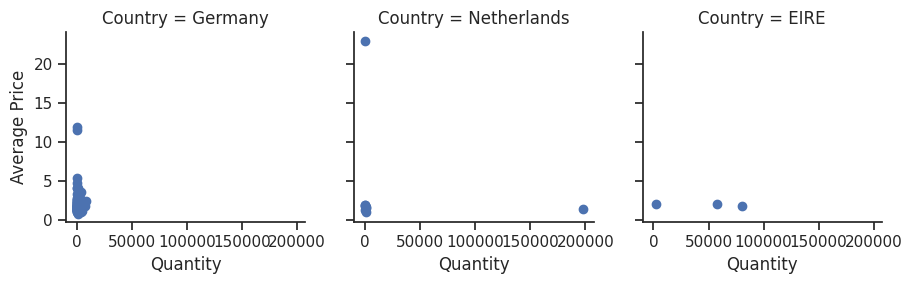

In [0]:
g = sns.FacetGrid(plottable, col="Country")
g.map(plt.scatter, "Quantity", "Average Price", alpha=1)
g.add_legend()

/home/spark-41280fd9-656e-4718-b897-b4/.ipykernel/2848/command-8529720509405109-2091742869:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plottable = grouped['Quantity','Revenue'].agg('sum')


[]

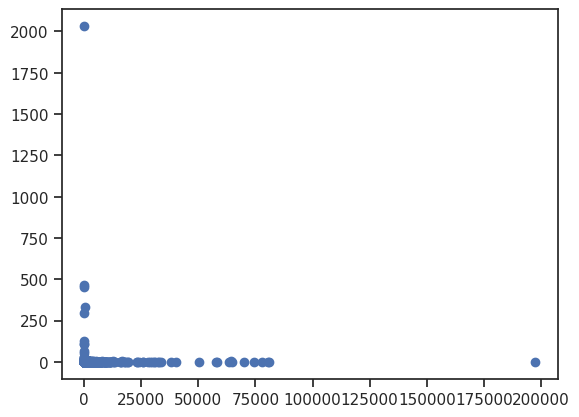

In [0]:
grouped = online_rt.groupby(['CustomerID'])
plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity
plt.scatter(plottable.Quantity, plottable.AvgPrice)
plt.plot()

[]

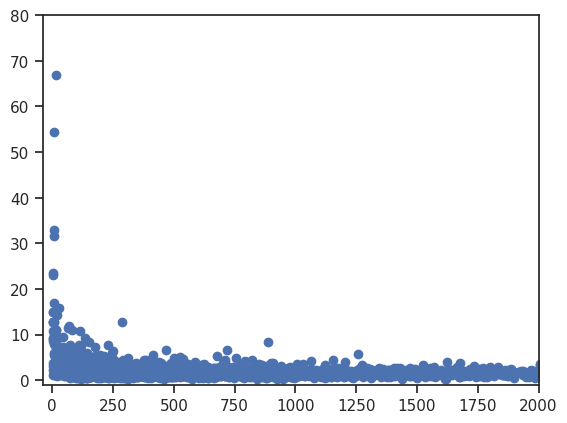

In [0]:
grouped = online_rt.groupby(['CustomerID','Country'])
plottable = grouped.agg({'Quantity': 'sum',
 'Revenue': 'sum'})
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity
plt.scatter(plottable.Quantity, plottable.AvgPrice)
plt.xlim(-40,2000)
plt.ylim(-1,80)
plt.plot()


In [0]:
price_start = 0
price_end = 50
price_interval = 1
buckets = np.arange(price_start,price_end,price_interval)
revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()


UnitPrice
(0, 1]    1107774.544
(1, 2]    2691765.110
(2, 3]    2024143.090
(3, 4]     865101.780
(4, 5]    1219377.050
Name: Revenue, dtype: float64

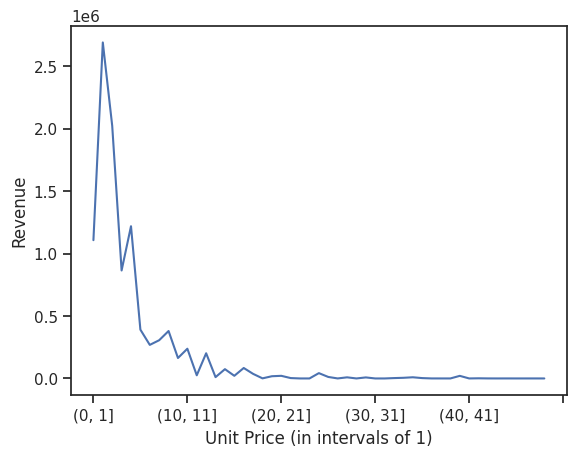

In [0]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()

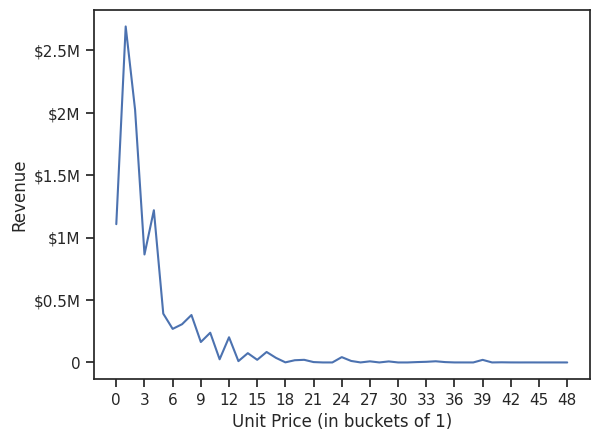

In [0]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.xticks(np.arange(price_start,price_end,3),
 np.arange(price_start,price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
 ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()